## 数据操作

### 1. 运行本节中的代码。将本节中的条件语句X == Y更改为X < Y或X > Y，然后看看你可以得到什么样的张量。

In [1]:
import torch

In [2]:
X = torch.arange(12, dtype=torch.float32).reshape(3, 4)
Y = torch.tensor([[2, 3, 4, 5], [6, 7, 8, 9], [10, 11, 12, 13]])

In [3]:
X, Y, X == Y, X < Y, X > Y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[ 2,  3,  4,  5],
         [ 6,  7,  8,  9],
         [10, 11, 12, 13]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]))

### 2. 用其他形状（例如三维张量）替换广播机制中按元素操作的两个张量。结果是否与预期相同？

符合基本规则：
1. 按顺序比较每个维度大小，维度相等比较下一个维度
2. 其中一个维度为1,则扩展为另一个维度的大小
3. 两个维度不相等且不为1,报错

In [4]:
X = torch.arange(6, dtype=torch.float32).reshape(1, 2, 3)
X

tensor([[[0., 1., 2.],
         [3., 4., 5.]]])

In [5]:
Y = torch.arange(3, dtype=torch.float32).reshape(1, 1, 3)
Y

tensor([[[0., 1., 2.]]])

In [6]:
X + Y

tensor([[[0., 2., 4.],
         [3., 5., 7.]]])

In [7]:
X = torch.arange(12, dtype=torch.float32).reshape(2, 2, 3)
X

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])

In [8]:
Y = torch.arange(1, dtype=torch.float32).reshape(1, 1, 1)
Y

tensor([[[0.]]])

In [9]:
X + Y

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])

In [10]:
X = torch.arange(6, dtype=torch.float32).reshape(1, 1, 6)
X

tensor([[[0., 1., 2., 3., 4., 5.]]])

In [11]:
Y = torch.arange(3, dtype=torch.float32).reshape(1, 1, 3)
Y

tensor([[[0., 1., 2.]]])

In [12]:
X + Y

RuntimeError: The size of tensor a (6) must match the size of tensor b (3) at non-singleton dimension 2

---
## pandas

### 1. 删除缺失值最多的列。

In [13]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [14]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [15]:
missing = data.isnull()  # 标记缺失值，返回一个布尔值的 DataFrame
missing

,NumRooms,Alley,Price
0,True,False,False
1,False,True,False
2,False,True,False
3,True,True,False


In [16]:
missing_counts = data.isnull().sum()
missing_counts

NumRooms    2
Alley       3
Price       0
dtype: int64

In [17]:
col_to_drop = missing_counts.idxmax() # 返回具有最大值的索引标签
col_to_drop, type(col_to_drop)

('Alley', str)

In [18]:
data = data.drop(columns=[col_to_drop]) # 删除指定列
data

,NumRooms,Price
0,NaN,127500
1,2.0,106000
2,4.0,178100
3,NaN,140000


### 2. 将预处理后的数据集转换为张量格式。

In [19]:
input, output = data.iloc[:, 0], data.iloc[:, 1]
input, output

(0    NaN
 1    2.0
 2    4.0
 3    NaN
 Name: NumRooms, dtype: float64,
 0    127500
 1    106000
 2    178100
 3    140000
 Name: Price, dtype: int64)

In [20]:
input = pd.get_dummies(input, dummy_na=True, dtype=float)
input

,2.0,4.0,NaN
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0


In [21]:
x, y = torch.Tensor(input.values), torch.Tensor(output.values)
x, y

(tensor([[0., 0., 1.],
         [1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]),
 tensor([127500., 106000., 178100., 140000.]))

---
## 线性代数

### 1. 给出两个矩阵$\mathbf{A}$和$\mathbf{B}$，证明“它们转置的和”等于“它们和的转置”，即$\mathbf{A}^\top + \mathbf{B}^\top = (\mathbf{A} + \mathbf{B})^\top$。

证明：
 
设$\mathbf{A}$为$m \times n$矩阵，其第$i$行第$j$列的元素为$A_{ij}$。根据转置的定义，$\mathbf{A}^\top$是$n \times m$矩阵，且满足：
$$
(\mathbf{A}^\top)_{ji} = A_{ij}.
$$

对$\mathbf{A}^\top$再次转置，得到$(\mathbf{A}^\top)^\top$，它是一个$m \times n$矩阵。根据转置的定义，其第$i$行第$j$列的元素为：
$$
[(\mathbf{A}^\top)^\top]_{ij} = (\mathbf{A}^\top)_{ji} = A_{ij}.
$$

由于对任意$i$和$j$，$[(\mathbf{A}^\top)^\top]_{ij} = A_{ij}$，即$(\mathbf{A}^\top)^\top$与$\mathbf{A}$在所有对应位置上的元素均相等，且维度一致，因此：
$$
(\mathbf{A}^\top)^\top = \mathbf{A}.
$$



### 2. 给定任意方阵$\mathbf{A}$，$\mathbf{A} + \mathbf{A}^\top$总是对称的吗?为什么?

证明：
对称 $\Rightarrow a_{ij} = a_{ji}$

$$A + (A)^T \therefore a'_{ij} = a_{ij} + a_{ji}$$

$$a'_{ji} = a_{ji} + a_{ij}$$

$$\therefore a'_{ij} = a'_{ji}$$

### 3. 本节中定义了形状$(2,3,4)$的张量`X`。`len(X)`的输出结果是什么？

In [22]:
A = torch.arange(24).reshape(2, 3, 4)
len(A)

2

### 4. 对于任意形状的张量`X`,`len(X)`是否总是对应于`X`特定轴的长度?这个轴是什么?

等于第一个轴的长度

In [23]:
A = torch.arange(24).reshape(4, 3, 2)
len(A)

4

### 5. 运行`A/A.sum(axis=1)`，看看会发生什么。请分析一下原因？

In [24]:
A/A.sum(axis=1)

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 1

In [46]:
A, A.sum(axis=1), A.shape, A.sum(axis=1).shape

(tensor([[[ 0,  1],
          [ 2,  3],
          [ 4,  5]],
 
         [[ 6,  7],
          [ 8,  9],
          [10, 11]],
 
         [[12, 13],
          [14, 15],
          [16, 17]],
 
         [[18, 19],
          [20, 21],
          [22, 23]]]),
 tensor([[ 6,  9],
         [24, 27],
         [42, 45],
         [60, 63]]),
 torch.Size([4, 3, 2]),
 torch.Size([4, 2]))

维度不相同，不符合广播机制，无法做除法

### 6. 考虑一个具有形状$(2,3,4)$的张量，在轴0、1、2上的求和输出是什么形状?
(3,4)、(2,4)、(2,3)
哪个轴求和就消除哪个轴

In [50]:
B = torch.arange(24, dtype=torch.float32).reshape(2, 3, 4)
B.sum(axis=0).shape, B.sum(axis=1).shape, B.sum(axis=2).shape

(torch.Size([3, 4]), torch.Size([2, 4]), torch.Size([2, 3]))

### 7. 为`linalg.norm`函数提供3个或更多轴的张量，并观察其输出。对于任意形状的张量这个函数计算得到什么?

In [51]:
torch.linalg.norm(B)

tensor(65.7571)

`torch.linalg.norm` 是 PyTorch 中用于计算张量范数的函数。范数是数学中衡量向量、矩阵或张量大小的一种方法。以下是关于 `linalg.norm` 和范数的详细讲解：

#### 范数的定义
范数是一个函数，表示向量或张量的“长度”或“大小”。对于一个向量 $\mathbf{x} = [x_1, x_2, \dots, x_n]$，常见的范数包括：

1. **L1 范数（曼哈顿范数）**：
   $$
   \|\mathbf{x}\|_1 = \sum_{i=1}^n |x_i|
   $$
   它是向量元素绝对值的总和。

2. **L2 范数（欧几里得范数）**：
   $$
   \|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}
   $$
   它是向量元素平方和的平方根，表示向量在欧几里得空间中的长度。

3. **无穷范数（最大范数）**：
   $$
   \|\mathbf{x}\|_\infty = \max(|x_1|, |x_2|, \dots, |x_n|)
   $$
   它是向量中绝对值最大的元素。

对于矩阵或更高维张量，范数的定义可以扩展，例如 **Frobenius 范数**。

---

#### `torch.linalg.norm` 的作用
`torch.linalg.norm` 用于计算张量的范数。它支持多种范数类型，并可以通过参数指定计算的维度。

##### 默认行为
默认情况下，`torch.linalg.norm` 计算整个张量的 **Frobenius 范数**，即：
$$
\|A\|_F = \sqrt{\sum_{i,j} |a_{ij}|^2}
$$
这是矩阵中所有元素平方和的平方根。

##### 参数说明
1. **`ord`**：指定范数类型，例如：
   - `ord=1`：L1 范数。
   - `ord=2`：L2 范数（默认）。
   - `ord='fro'`：Frobenius 范数（默认用于矩阵）。
   - `ord=np.inf`：无穷范数。

2. **`dim`**：指定沿哪些维度计算范数。例如：
   - 如果 `dim=None`，计算整个张量的范数。
   - 如果指定 `dim=(0, 1)`，则沿第 0 和第 1 维计算范数。


---
## 微积分

### 1. 绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。


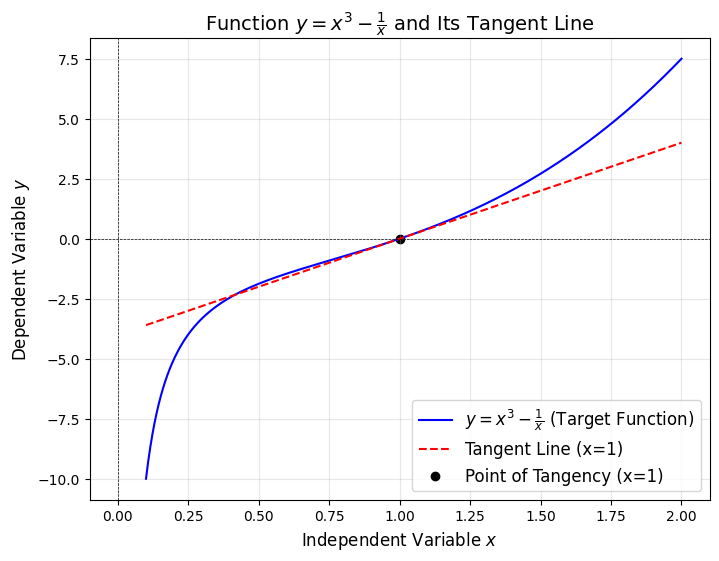

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) and its derivative f'(x)
def f(x):
    return x**3 - 1/x

def f_prime(x):
    return 3*x**2 + 1/(x**2)

# Define the tangent line function
def tangent_line(x, x0):
    slope = f_prime(x0)  # Slope of the tangent line
    y0 = f(x0)           # Point on the tangent line
    return slope * (x - x0) + y0

# Define the range of x
x = np.linspace(0.1, 2, 500)  # Avoid x = 0 to prevent division by zero
x0 = 1  # Point of tangency

# Plot the function and the tangent line
plt.figure(figsize=(8, 6))
plt.plot(x, f(x), label=r"$y = x^3 - \frac{1}{x}$ (Target Function)", color="blue")
plt.plot(x, tangent_line(x, x0), label="Tangent Line (x=1)", color="red", linestyle="--")

# Mark the tangent point
plt.scatter([x0], [f(x0)], color="black", label="Point of Tangency (x=1)")

# Configure the plot
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.title("Function $y = x^3 - \\frac{1}{x}$ and Its Tangent Line", fontsize=14)
plt.xlabel("Independent Variable $x$", fontsize=12)
plt.ylabel("Dependent Variable $y$", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

### 2. 求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。

$$
\mathbf{\nabla}f(\mathbf{x}) = 
\begin{pmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2}
\end{pmatrix}
= 
\begin{pmatrix}
6x_1 \\
5e^{x_2}
\end{pmatrix}
$$


### 3. 函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？
函数 $f(\mathbf{x}) = \|\mathbf{x}\|_2$ 表示的是向量 $\mathbf{x}$ 的欧几里得范数（或L2范数），也就是向量 $\mathbf{x}$ 的长度。对于一个向量 $\mathbf{x} = (x_1, x_2, ..., x_n)$，其欧几里得范数定义为：

$$
f(\mathbf{x}) = \|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + ... + x_n^2}
$$

要找到这个函数的梯度，我们需要计算它关于每个分量 $x_i$ 的偏导数。对于每个 $i$，偏导数为：

$$
\frac{\partial f}{\partial x_i} = \frac{x_i}{\|\mathbf{x}\|_2}
$$

因此，函数 $f(\mathbf{x})$ 的梯度 $\mathbf{\nabla}f(\mathbf{x})$ 是一个向量，其第 $i$ 个分量是 $\frac{\partial f}{\partial x_i}$，可以表示为：

$$
\mathbf{\nabla}f(\mathbf{x}) = \left( \frac{x_1}{\|\mathbf{x}\|_2}, \frac{x_2}{\|\mathbf{x}\|_2}, ..., \frac{x_n}{\|\mathbf{x}\|_2} \right)
$$

或者更简洁地表示为：

$$
\mathbf{\nabla}f(\mathbf{x}) = \frac{\mathbf{x}}{\|\mathbf{x}\|_2}
$$



### 4. 尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。

$$
\frac{\partial u}{\partial a} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial a} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial a} + \frac{\partial f}{\partial z} \frac{\partial z}{\partial a}
$$

$$
\frac{\partial u}{\partial b} = \frac{\partial f}{\partial x} \frac{\partial x}{\partial b} + \frac{\partial f}{\partial y} \frac{\partial y}{\partial b} + \frac{\partial f}{\partial z} \frac{\partial z}{\partial b}
$$


---
## 自动求导数


### 1. 为什么计算二阶导数比一阶导数的开销要更大？

1. **计算复杂度更高**：二阶导数涉及对一阶导数再次求导，计算量成倍增加。
2. **自动微分开销**：在自动微分中，计算二阶导数需要更多的反向传播步骤，增加了时间和内存消耗。

### 2. 在运行反向传播函数之后，立即再次运行它，看看会发生什么。


In [28]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [38]:
x.requires_grad_(True)
x.grad

tensor([ 0.,  4.,  8., 12.])

In [39]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [40]:
y.backward()
x.grad

tensor([ 0.,  8., 16., 24.])

In [41]:
y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

默认一个计算图只能调用一次.backward(),下一次调用前先清除梯度，此时计算图也会被清零

In [47]:
x.grad.zero_()
y.backward()
x.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [48]:
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

### 3. 在控制流的例子中，我们计算`d`关于`a`的导数，如果将变量`a`更改为随机向量或矩阵，会发生什么？
除了结果变成矩阵，没有其他事情发生

In [52]:
x = torch.arange(6.0).reshape(2, 3)
x.requires_grad_(True)

tensor([[0., 1., 2.],
        [3., 4., 5.]], requires_grad=True)

In [54]:
y = x * x
u = y.detach() # 把y当成一个常数，而不是x的函数，u 不再与 x 有梯度关系
y, u

(tensor([[ 0.,  1.,  4.],
         [ 9., 16., 25.]], grad_fn=<MulBackward0>),
 tensor([[ 0.,  1.,  4.],
         [ 9., 16., 25.]]))

In [56]:
z = u * x
z

tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]], grad_fn=<MulBackward0>)

In [57]:
z.sum().backward()
x.grad == u

tensor([[True, True, True],
        [True, True, True]])

In [58]:
x.grad.zero_()
y.sum().backward()
x.grad == 2*x

tensor([[True, True, True],
        [True, True, True]])

### 4. 重新设计一个求控制流梯度的例子，运行并分析结果。


In [62]:
x = torch.arange(4.).reshape(2, 2)
x.requires_grad_(True)

tensor([[0., 1.],
        [2., 3.]], requires_grad=True)

In [76]:
y = x * x
y

tensor([[0., 1.],
        [4., 9.]], grad_fn=<MulBackward0>)

In [68]:
u = y.detach()

In [70]:
z = u * x

In [77]:
y.sum().backward()
x.grad == 2*x

tensor([[True, True],
        [True, True]])

In [80]:
x.grad.zero_()
z = u * x
z.sum().backward()
x.grad == u

tensor([[True, True],
        [True, True]])

### 5. 使$f(x)=\sin(x)$，绘制$f(x)$和$\frac{df(x)}{dx}$的图像，其中后者不使用$f'(x)=\cos(x)$。


In [91]:
x = torch.arange(-5, 5, 0.01)
x.requires_grad_(True)

tensor([-5.0000e+00, -4.9900e+00, -4.9800e+00, -4.9700e+00, -4.9600e+00,
        -4.9500e+00, -4.9400e+00, -4.9300e+00, -4.9200e+00, -4.9100e+00,
        -4.9000e+00, -4.8900e+00, -4.8800e+00, -4.8700e+00, -4.8600e+00,
        -4.8500e+00, -4.8400e+00, -4.8300e+00, -4.8200e+00, -4.8100e+00,
        -4.8000e+00, -4.7900e+00, -4.7800e+00, -4.7700e+00, -4.7600e+00,
        -4.7500e+00, -4.7400e+00, -4.7300e+00, -4.7200e+00, -4.7100e+00,
        -4.7000e+00, -4.6900e+00, -4.6800e+00, -4.6700e+00, -4.6600e+00,
        -4.6500e+00, -4.6400e+00, -4.6300e+00, -4.6200e+00, -4.6100e+00,
        -4.6000e+00, -4.5900e+00, -4.5800e+00, -4.5700e+00, -4.5600e+00,
        -4.5500e+00, -4.5400e+00, -4.5300e+00, -4.5200e+00, -4.5100e+00,
        -4.5000e+00, -4.4900e+00, -4.4800e+00, -4.4700e+00, -4.4600e+00,
        -4.4500e+00, -4.4400e+00, -4.4300e+00, -4.4200e+00, -4.4100e+00,
        -4.4000e+00, -4.3900e+00, -4.3800e+00, -4.3700e+00, -4.3600e+00,
        -4.3500e+00, -4.3400e+00, -4.3300e+00, -4.3

In [93]:

y

tensor([ 2.8366e-01,  2.7406e-01,  2.6443e-01,  2.5477e-01,  2.4509e-01,
         2.3538e-01,  2.2565e-01,  2.1590e-01,  2.0612e-01,  1.9633e-01,
         1.8651e-01,  1.7668e-01,  1.6683e-01,  1.5696e-01,  1.4708e-01,
         1.3718e-01,  1.2727e-01,  1.1734e-01,  1.0740e-01,  9.7456e-02,
         8.7499e-02,  7.7533e-02,  6.7560e-02,  5.7579e-02,  4.7593e-02,
         3.7602e-02,  2.7608e-02,  1.7610e-02,  7.6112e-03, -2.3889e-03,
        -1.2388e-02, -2.2387e-02, -3.2383e-02, -4.2377e-02, -5.2365e-02,
        -6.2349e-02, -7.2326e-02, -8.2296e-02, -9.2258e-02, -1.0221e-01,
        -1.1215e-01, -1.2208e-01, -1.3200e-01, -1.4191e-01, -1.5180e-01,
        -1.6168e-01, -1.7154e-01, -1.8138e-01, -1.9120e-01, -2.0101e-01,
        -2.1080e-01, -2.2056e-01, -2.3030e-01, -2.4002e-01, -2.4972e-01,
        -2.5939e-01, -2.6903e-01, -2.7865e-01, -2.8824e-01, -2.9780e-01,
        -3.0733e-01, -3.1683e-01, -3.2630e-01, -3.3574e-01, -3.4514e-01,
        -3.5451e-01, -3.6384e-01, -3.7314e-01, -3.8

In [103]:
x.grad.zero_()
y = torch.sin(x)
y.sum().backward()
x.grad

tensor([ 2.8366e-01,  2.7406e-01,  2.6443e-01,  2.5477e-01,  2.4509e-01,
         2.3538e-01,  2.2565e-01,  2.1590e-01,  2.0612e-01,  1.9633e-01,
         1.8651e-01,  1.7668e-01,  1.6683e-01,  1.5696e-01,  1.4708e-01,
         1.3718e-01,  1.2727e-01,  1.1734e-01,  1.0740e-01,  9.7456e-02,
         8.7499e-02,  7.7533e-02,  6.7560e-02,  5.7579e-02,  4.7593e-02,
         3.7602e-02,  2.7608e-02,  1.7610e-02,  7.6112e-03, -2.3889e-03,
        -1.2388e-02, -2.2387e-02, -3.2383e-02, -4.2377e-02, -5.2365e-02,
        -6.2349e-02, -7.2326e-02, -8.2296e-02, -9.2258e-02, -1.0221e-01,
        -1.1215e-01, -1.2208e-01, -1.3200e-01, -1.4191e-01, -1.5180e-01,
        -1.6168e-01, -1.7154e-01, -1.8138e-01, -1.9120e-01, -2.0101e-01,
        -2.1080e-01, -2.2056e-01, -2.3030e-01, -2.4002e-01, -2.4972e-01,
        -2.5939e-01, -2.6903e-01, -2.7865e-01, -2.8824e-01, -2.9780e-01,
        -3.0733e-01, -3.1683e-01, -3.2630e-01, -3.3574e-01, -3.4514e-01,
        -3.5451e-01, -3.6384e-01, -3.7314e-01, -3.8

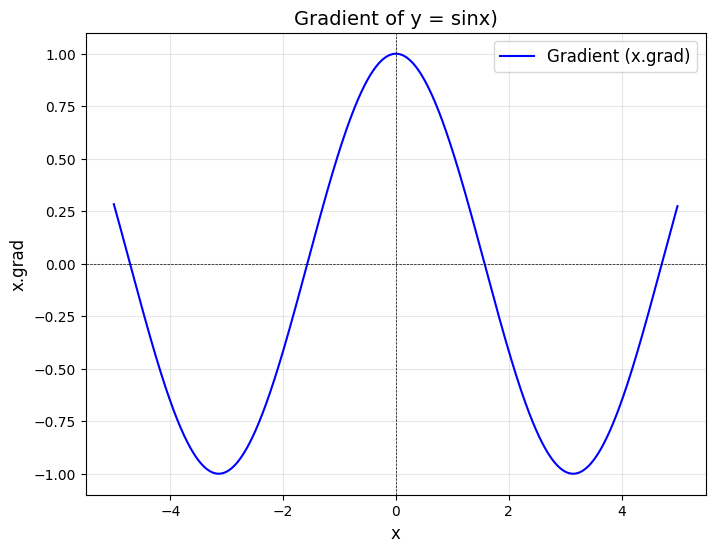

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

# 绘制图像
plt.figure(figsize=(8, 6))
plt.plot(x.detach().numpy(), x.grad.numpy(), label="Gradient (x.grad)", color="blue")
plt.title("Gradient of y = sinx)", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("x.grad", fontsize=12)
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

---
## 概率

### 1. 进行$m=500$组实验，每组抽取$n=10$个样本。改变$m$和$n$，观察和分析实验结果。


In [106]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [115]:
fair_probs = torch.ones([6]) / 6

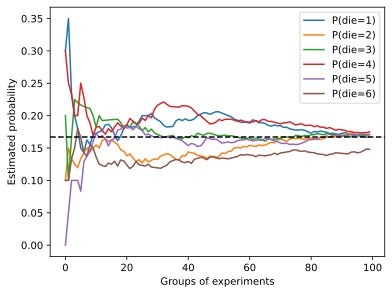

In [138]:
counts = multinomial.Multinomial(10, fair_probs).sample((100,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

m 的作用：控制实验组数，影响收敛速度。
n 的作用：控制每组样本数，影响单次实验的随机性。

### 2. 给定两个概率为$P(\mathcal{A})$和$P(\mathcal{B})$的事件，计算$P(\mathcal{A} \cup \mathcal{B})$和$P(\mathcal{A} \cap \mathcal{B})$的上限和下限。（提示：使用[友元图](https://en.wikipedia.org/wiki/Venn_diagram)来展示这些情况。)


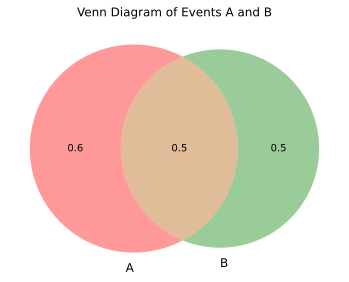

In [140]:
from matplotlib_venn import venn2

# 定义事件 A 和 B 的概率
P_A = 0.6
P_B = 0.5

# 绘制友元图
plt.figure(figsize=(6, 6))
venn = venn2(subsets=(P_A, P_B, min(P_A, P_B)), set_labels=('A', 'B'))

# 设置标题
plt.title("Venn Diagram of Events A and B")
plt.show()

$P(\mathcal{A} \cup \mathcal{B})$ 的范围： $ \max(P(\mathcal{A}), P(\mathcal{B})) \leq P(\mathcal{A} \cup \mathcal{B}) \leq P(\mathcal{A}) + P(\mathcal{B}) $

$P(\mathcal{A} \cap \mathcal{B})$ 的范围： $ 0 \leq P(\mathcal{A} \cap \mathcal{B}) \leq \min(P(\mathcal{A}), P(\mathcal{B})) $

### 3. 假设我们有一系列随机变量，例如$A$、$B$和$C$，其中$B$只依赖于$A$，而$C$只依赖于$B$，能简化联合概率$P(A, B, C)$吗？（提示：这是一个[马尔可夫链](https://en.wikipedia.org/wiki/Markov_chain)。)

联合概率 $P(A, B, C)$ 可以简化。
根据马尔可夫链的性质，如果 $B$ 只依赖于 $A$，而 $C$ 只依赖于 $B$，则联合概率可以分解为：

$$
P(A, B, C) = P(A) \cdot P(B \mid A) \cdot P(C \mid B)
$$

### 解释：
1. **马尔可夫链的性质**：
   - 在马尔可夫链中，当前状态只依赖于前一个状态，与更早的状态无关。
   - 这里，$B$ 只依赖于 $A$，$C$ 只依赖于 $B$。

2. **联合概率的分解**：
   - 根据概率的链式法则，联合概率可以写为：
     $$
     P(A, B, C) = P(A) \cdot P(B \mid A) \cdot P(C \mid A, B)
     $$
   - 由于 $C$ 只依赖于 $B$，即 $P(C \mid A, B) = P(C \mid B)$，因此可以进一步简化为：
     $$
     P(A, B, C) = P(A) \cdot P(B \mid A) \cdot P(C \mid B)
     $$